# **Heart Disease Prediction using XGBoost and ANN**

Dataset:
The dataset we'll be using includes various features related to patients' health and lifestyle. Each row represents a unique patient and includes attributes such as age, sex, general health, checkup frequency, exercise habits, and smoking history. The dataset also includes target variables representing the presence of various diseases.

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

**1. Analysing the data**

In [3]:
# Reading the data

df=pd.read_csv('/content/drive/MyDrive/heart_disease.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df.tail()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0
308853,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,160.0,81.19,31.71,No,1.0,5.0,12.0,1.0


In [5]:
df.shape

(308854, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [7]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [8]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308854.0,170.62,10.66,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308854.0,83.59,21.34,24.95,68.04,81.65,95.25,293.02
BMI,308854.0,28.63,6.52,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308854.0,5.10,8.20,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308854.0,29.84,24.88,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308854.0,15.11,14.93,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308854.0,6.30,8.58,0.00,2.00,4.00,8.00,128.00


**2.Exploratory Data Analysis(EDA)**

<Axes: >

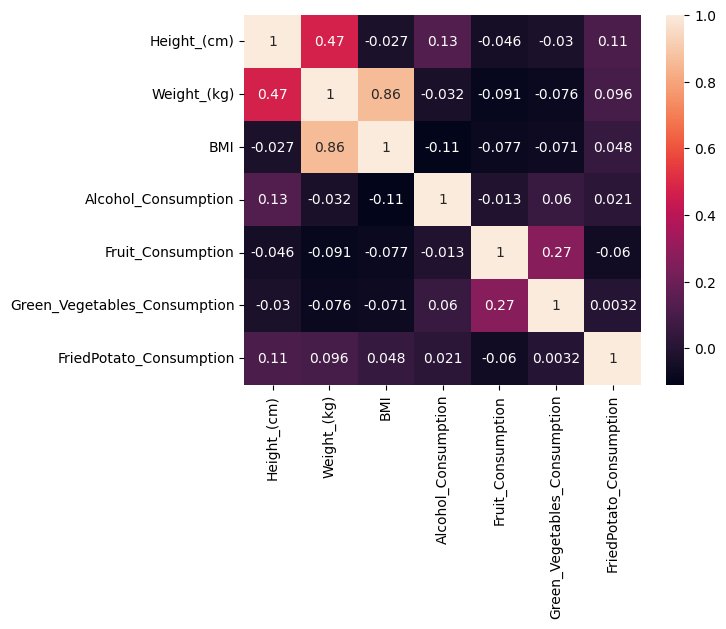

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
#distribution of numerical variables

df1 = df.select_dtypes(include = ['float64', 'int64'])
df1.head()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0


array([[<Axes: title={'center': 'Height_(cm)'}>,
        <Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>,
        <Axes: title={'center': 'Green_Vegetables_Consumption'}>],
       [<Axes: title={'center': 'FriedPotato_Consumption'}>, <Axes: >,
        <Axes: >]], dtype=object)

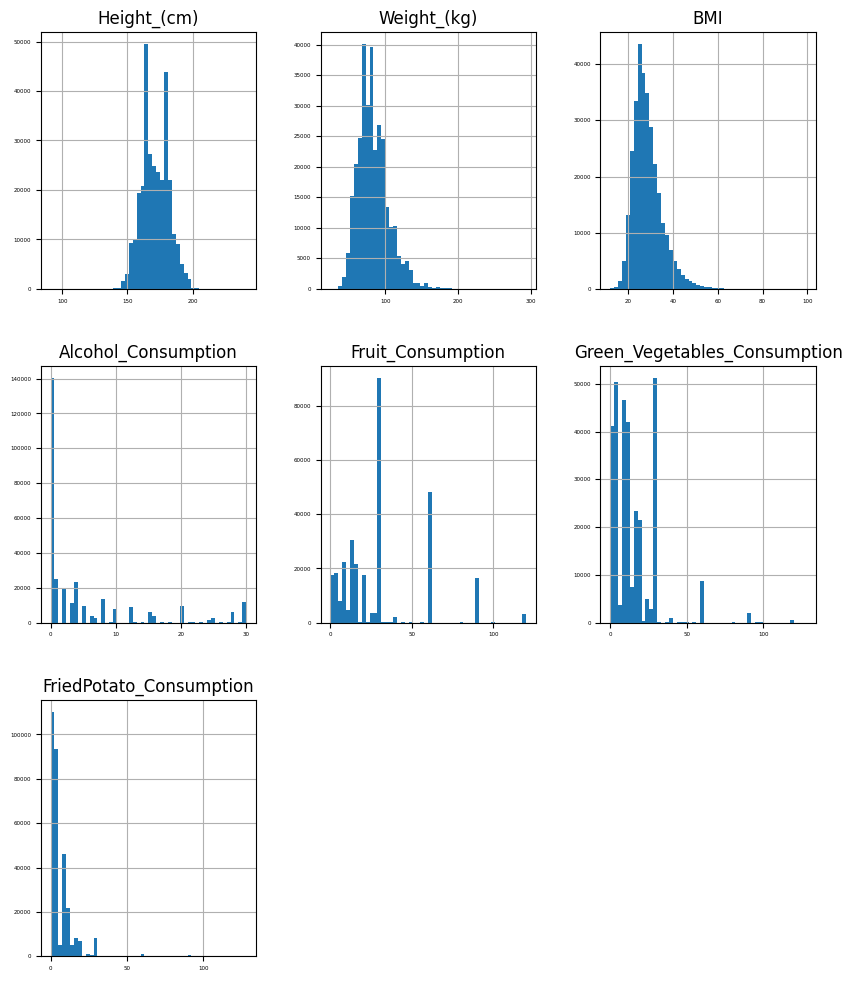

In [11]:
#histogram

df1.hist(figsize=(10, 12), bins=50, xlabelsize=4, ylabelsize=4)

Interpretation of Results:

Height_(cm): The height of the patients seems to follow a normal distribution, with the majority of patients having heights around 160 to 180 cm.

Weight_(kg): The weight of the patients also appears to be normally distributed, with most patients weighing between approximately 60 and 100 kg.

BMI: The distribution of Body Mass Index is somewhat right-skewed. A large number of patients have a BMI between 20 and 30, which falls within the normal to overweight range. However, there are also a significant number of patients with a BMI in the obese range (>30).

Alcohol_Consumption: This feature is heavily right-skewed. Most patients have low alcohol consumption, but there are a few patients with high consumption.

Fruit_Consumption: This feature is also right-skewed. A lot of patients consume fruits regularly, but a significant number consume them less frequently.

Green_Vegetables_Consumption: This feature appears to be normally distributed, with most patients consuming green vegetables moderately.

FriedPotato_Consumption: This feature is right-skewed. Many patients consume fried potatoes less frequently, while a few consume them more often.

In [12]:
#categorical variables

df2 = df.select_dtypes(include = ['object'])
df2.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,Yes
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,No
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,No
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,No
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,Yes


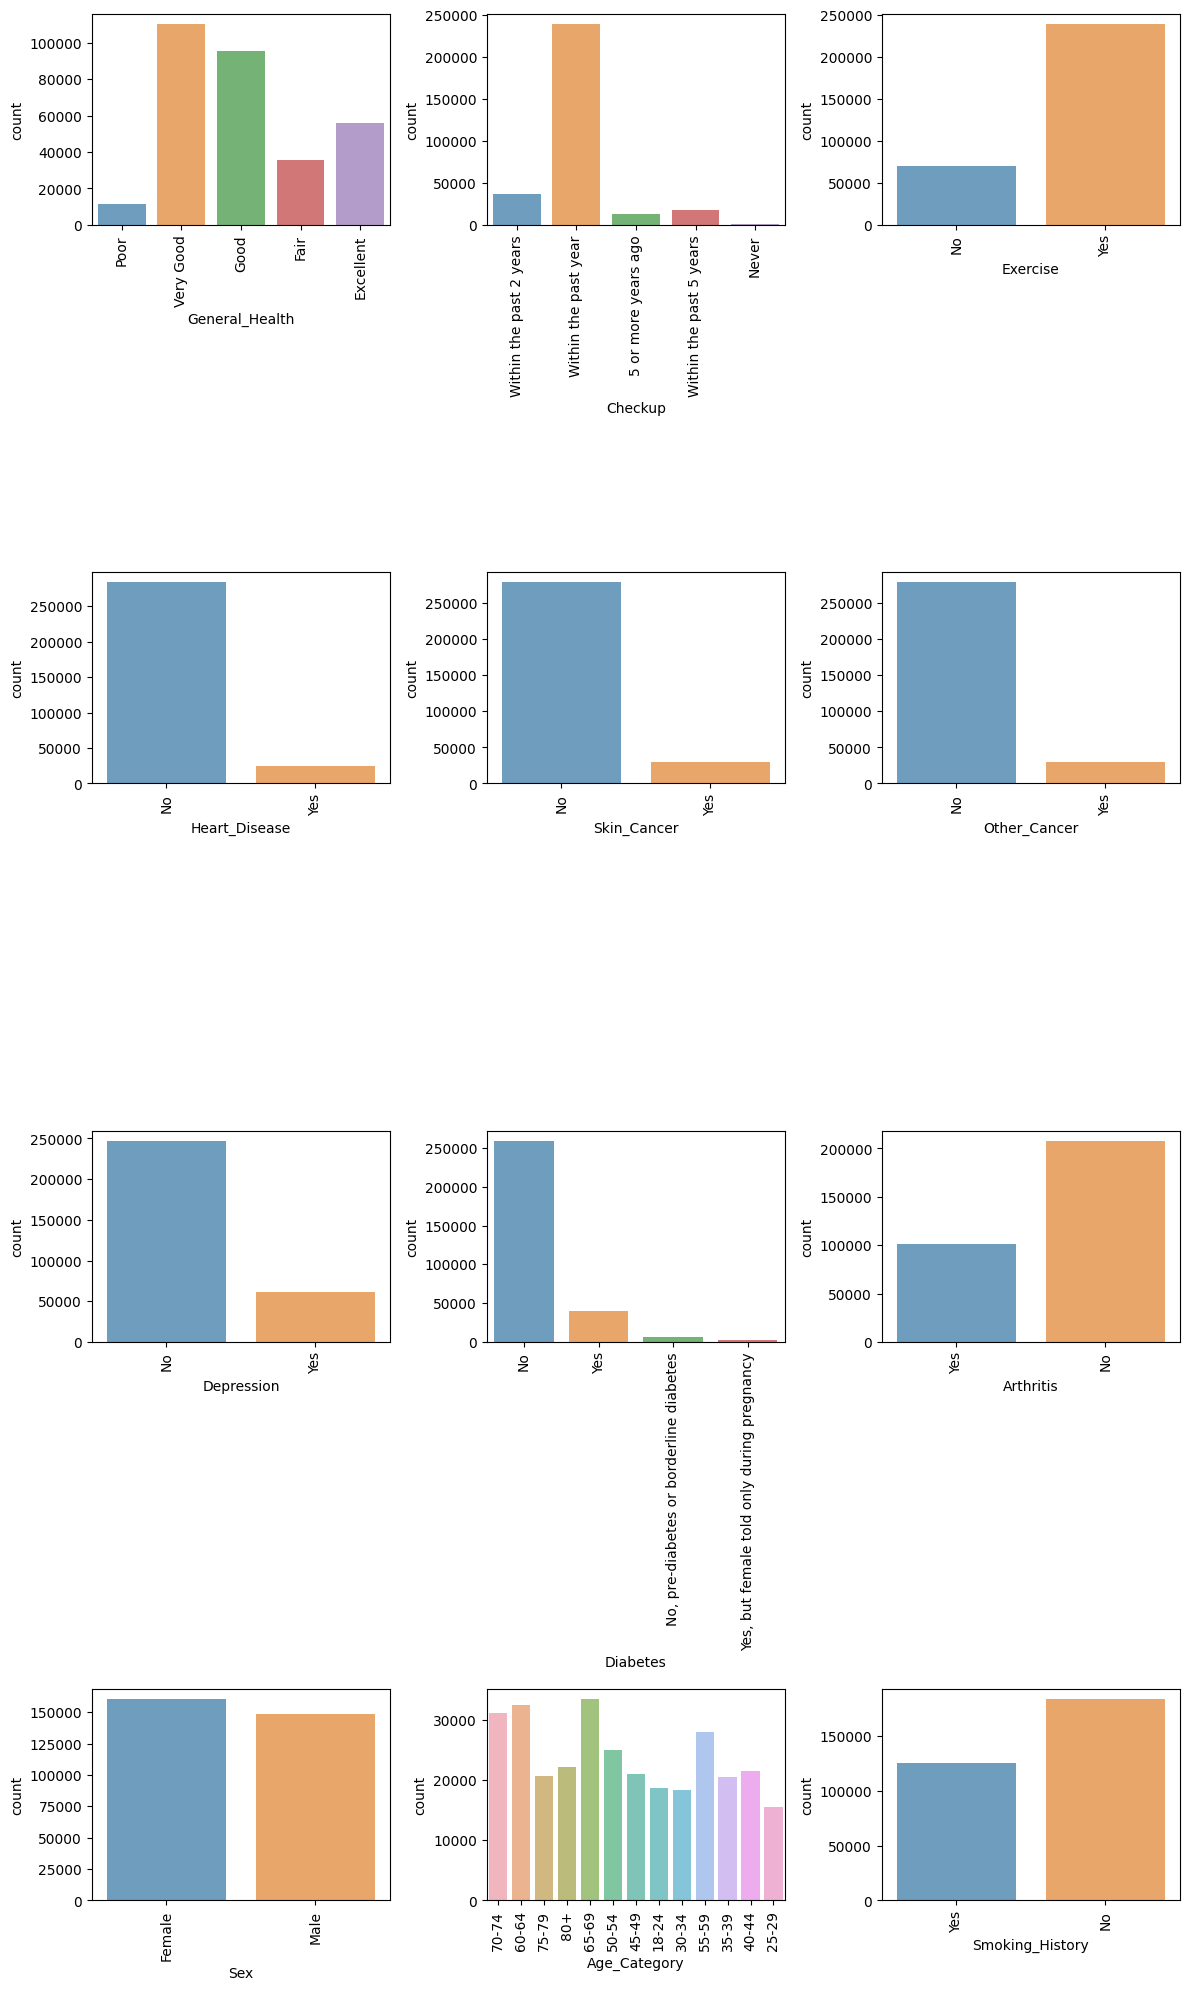

In [13]:
fig, axes = plt.subplots(round(len(df2.columns) / 3), 3, figsize=(12, 20))

for i, ax in enumerate(fig.axes):
    if i < len(df2.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation='vertical')
        sns.countplot(x=df2.columns[i], alpha=0.7, data=df2, ax=ax)

fig.tight_layout()

Interpretation of Results:

General_Health: Most patients describe their general health as "Good", with "Very Good" being the second most common response. Fewer patients rate their health as "Fair" or "Poor".

Checkup: The majority of patients had a checkup within the past year. Fewer patients had their last checkup 2 years ago or more than 5 years ago.

Exercise: More patients reported that they exercise compared to those who do not.

Heart_Disease: A significant majority of patients do not have heart disease. Only a small proportion of patients have heart disease.

Skin_Cancer: The vast majority of patients do not have skin cancer.

Other_Cancer: Similar to skin cancer, most patients do not have other forms of cancer.

Depression: Most patients do not suffer from depression. However, a non-trivial number of patients do report having depression.

Diabetes: Similar to the disease-related features above, most patients do not have diabetes. However, a small proportion do have diabetes.

Arthritis: Most patients do not have arthritis, but a significant number do.

Sex: There are slightly more female patients than male patients in the dataset.

Age_Category: The dataset includes patients from a wide range of age categories. The 50-54 age category has the most patients, followed by the 55-59 and 60-64 categories.

Smoking_History: The majority of patients do not have a history of smoking.

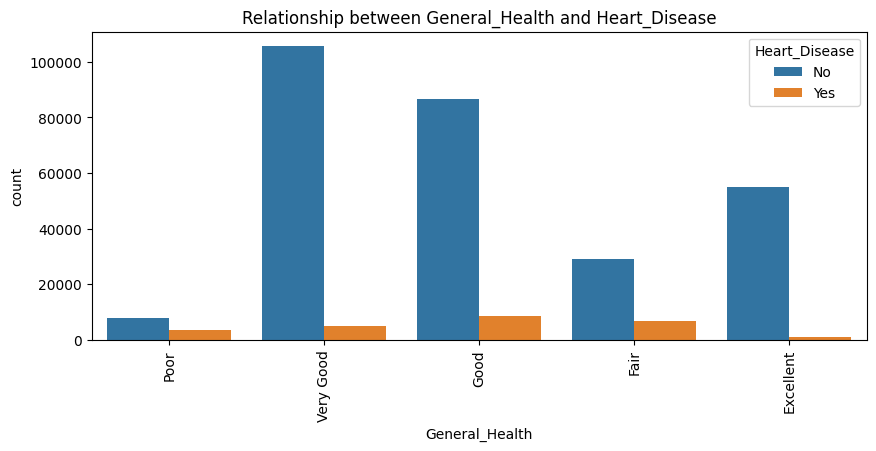

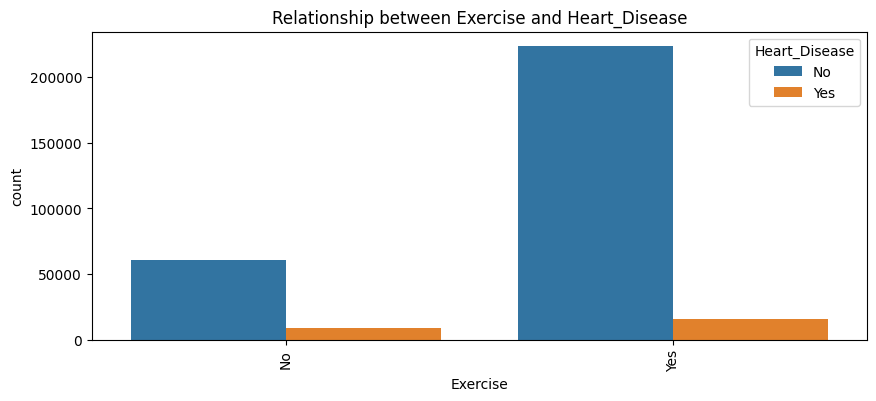

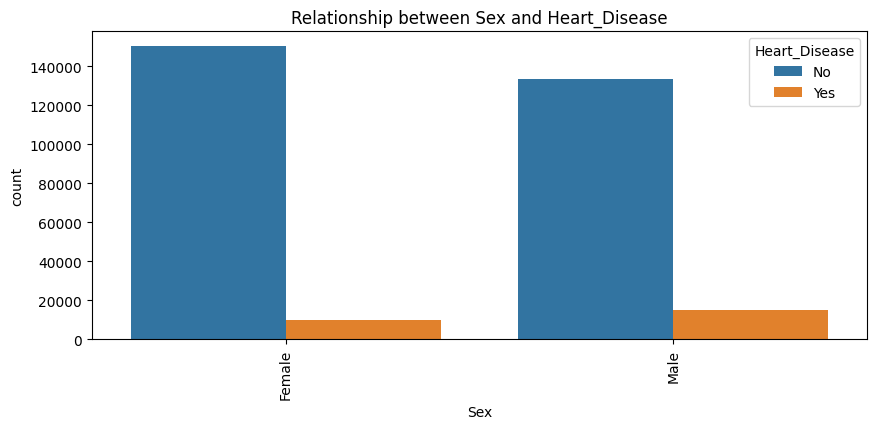

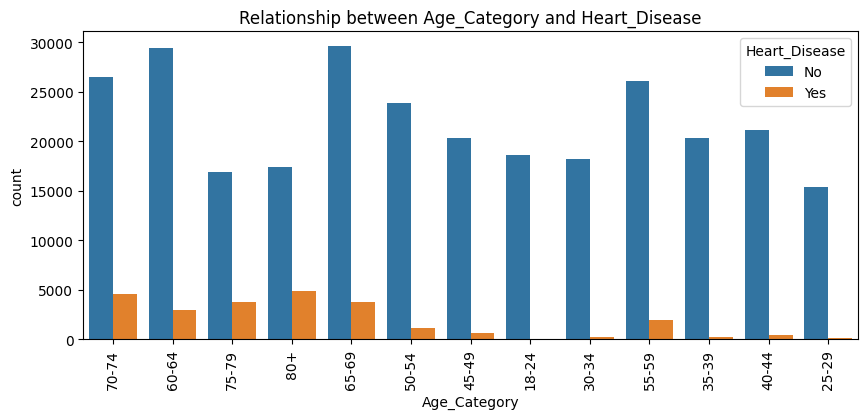

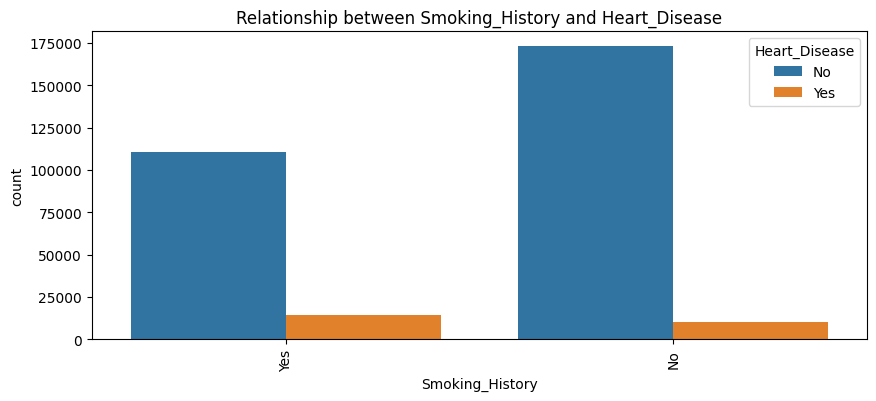

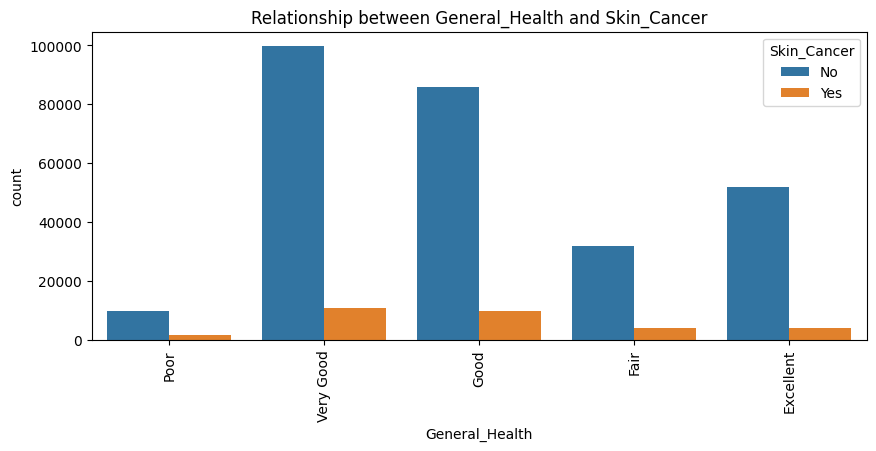

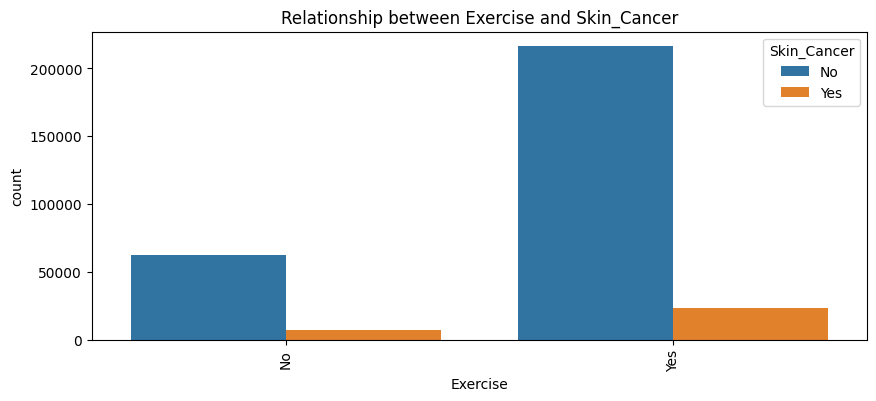

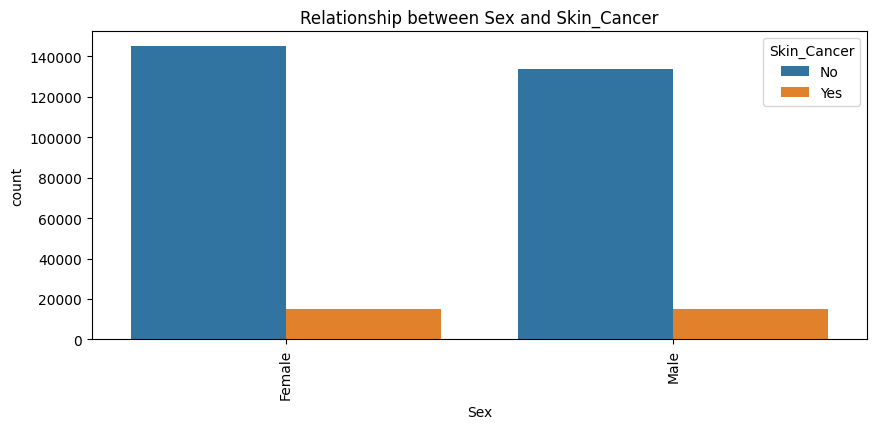

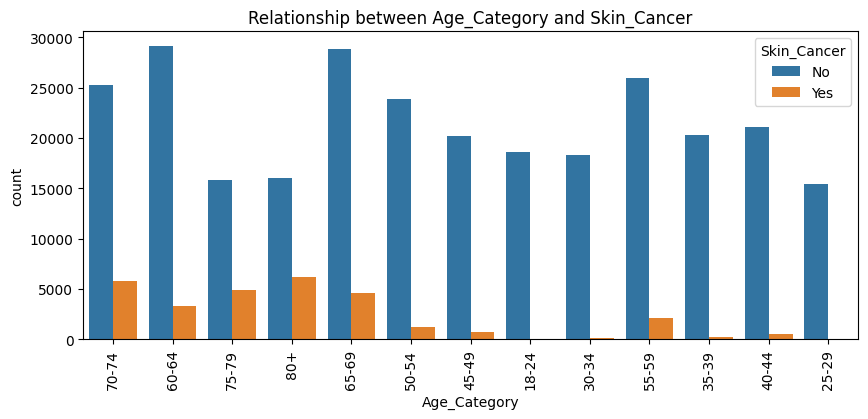

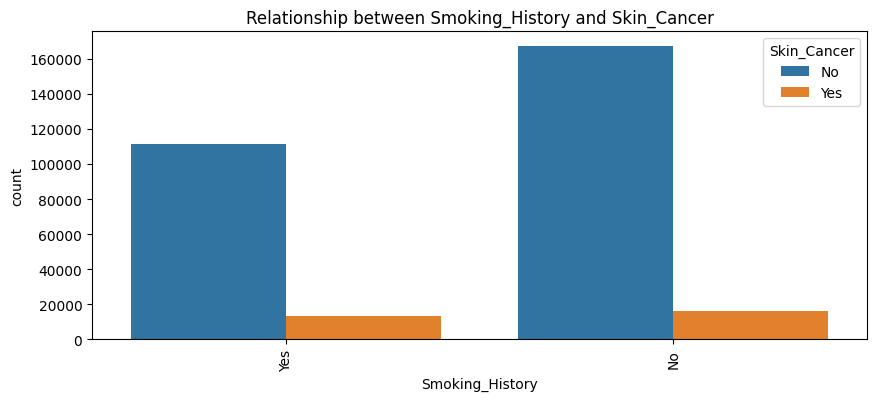

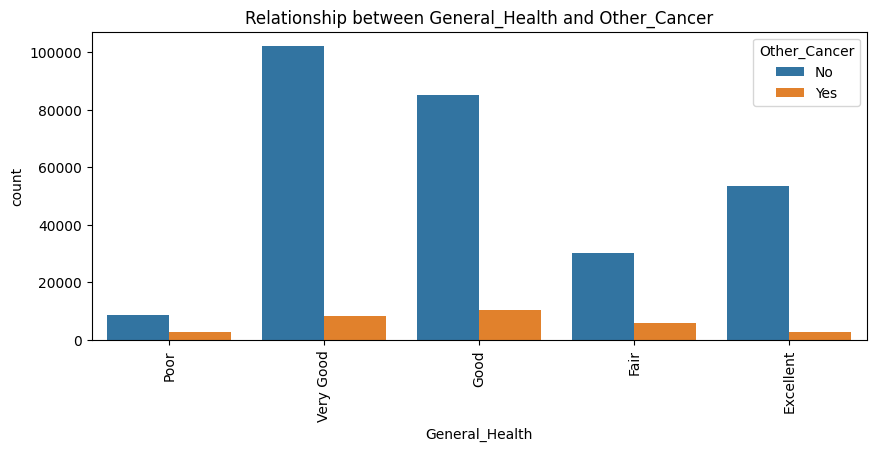

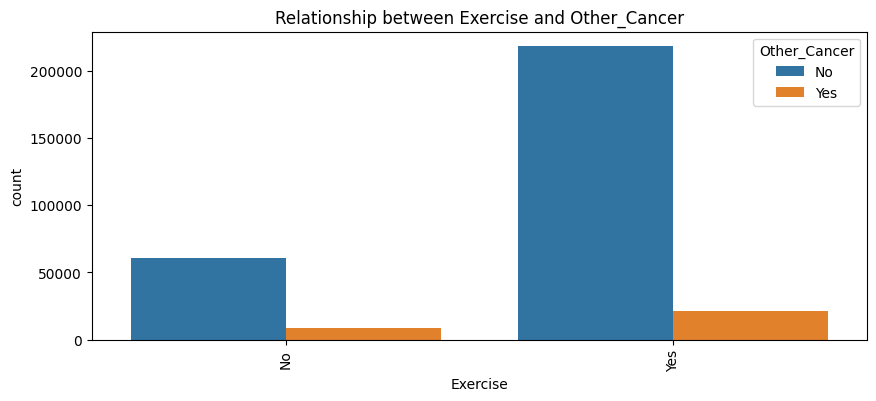

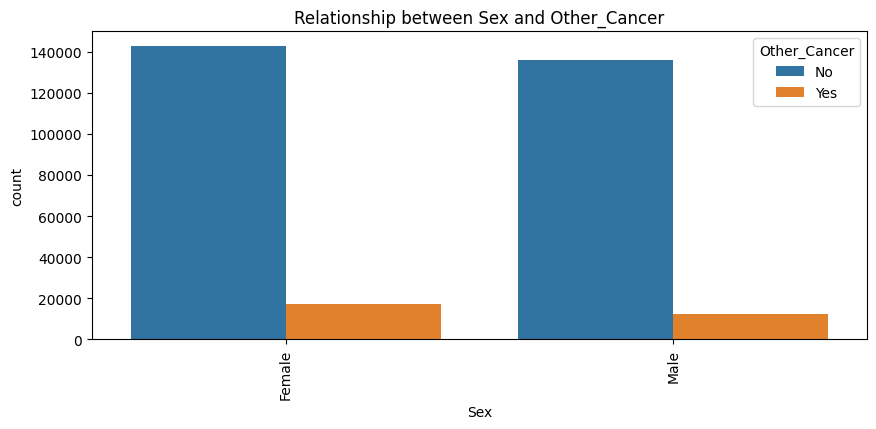

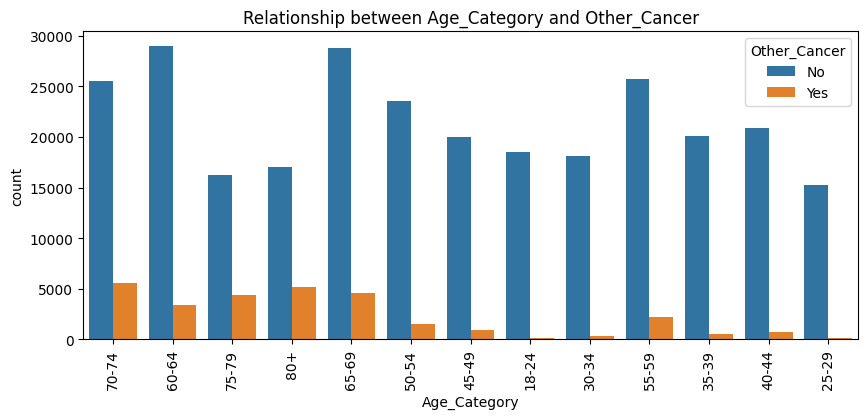

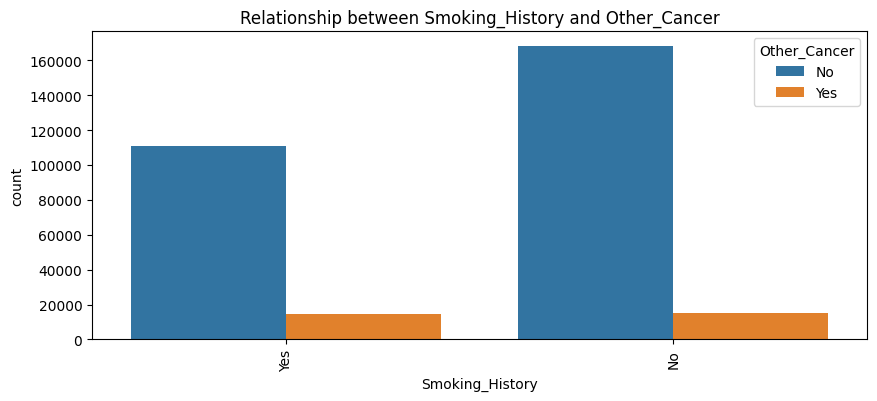

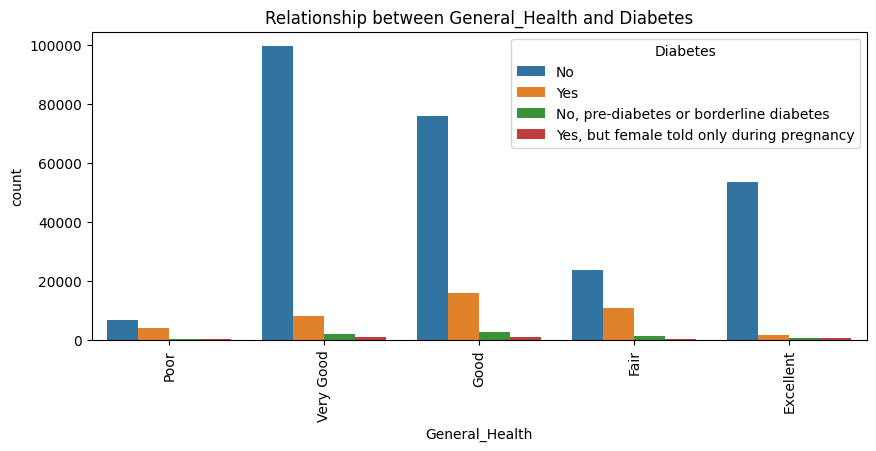

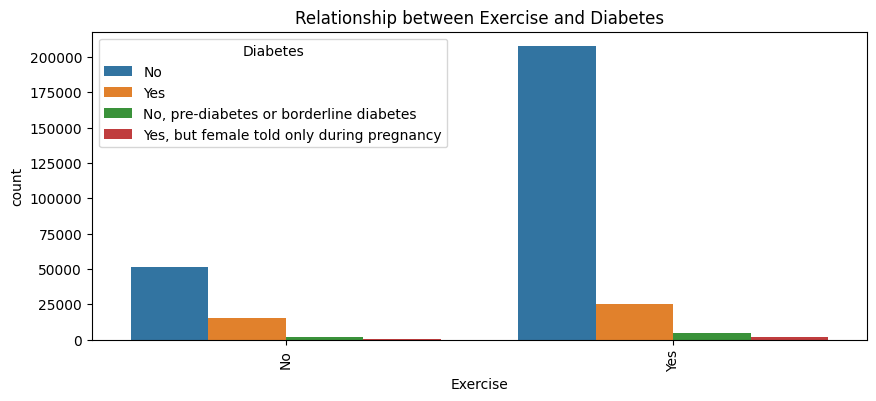

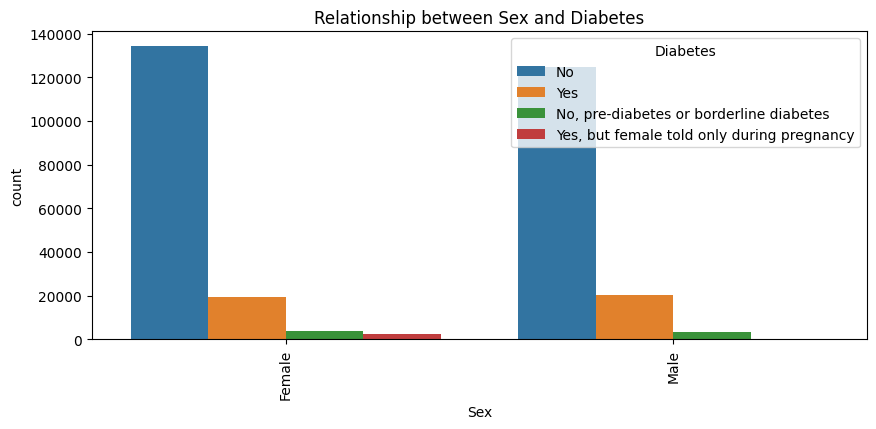

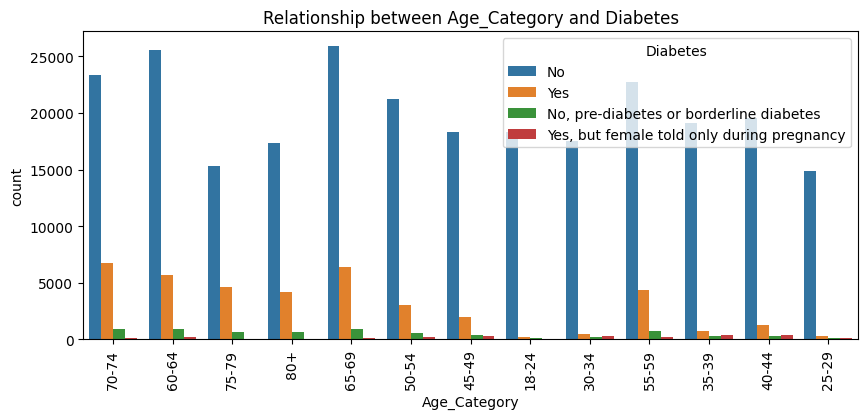

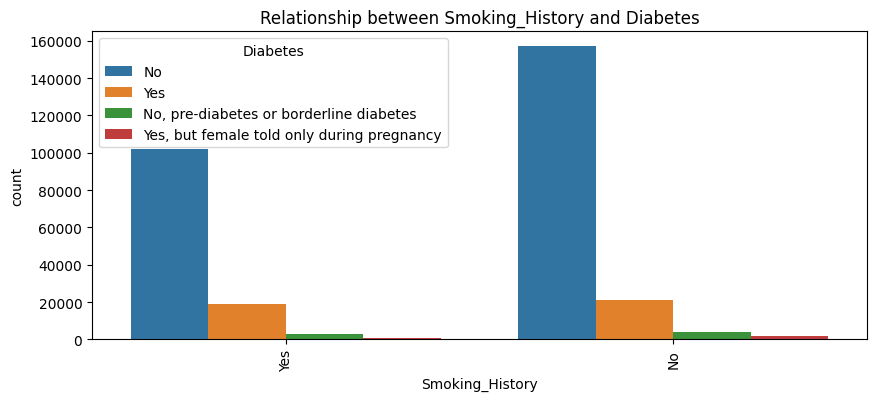

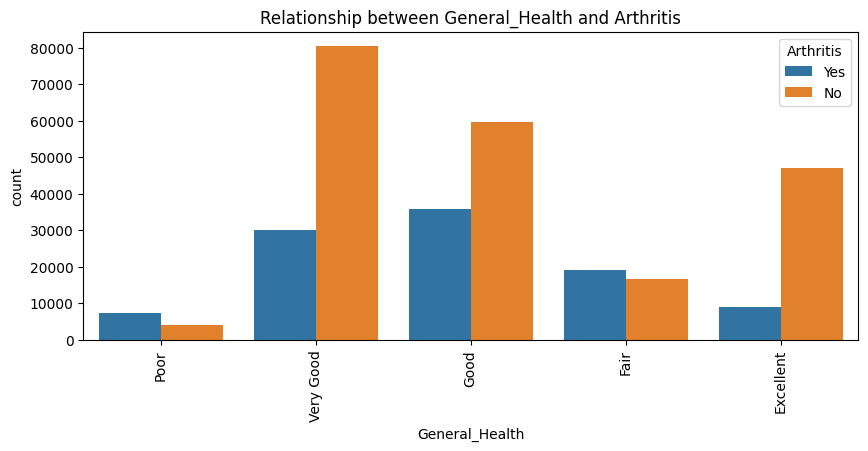

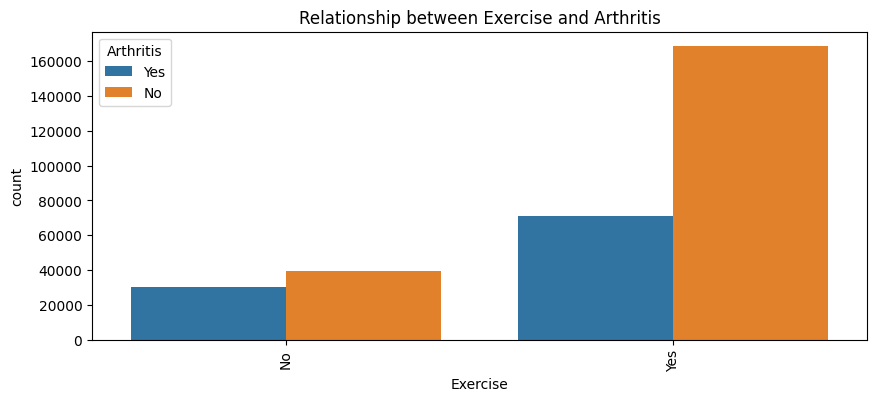

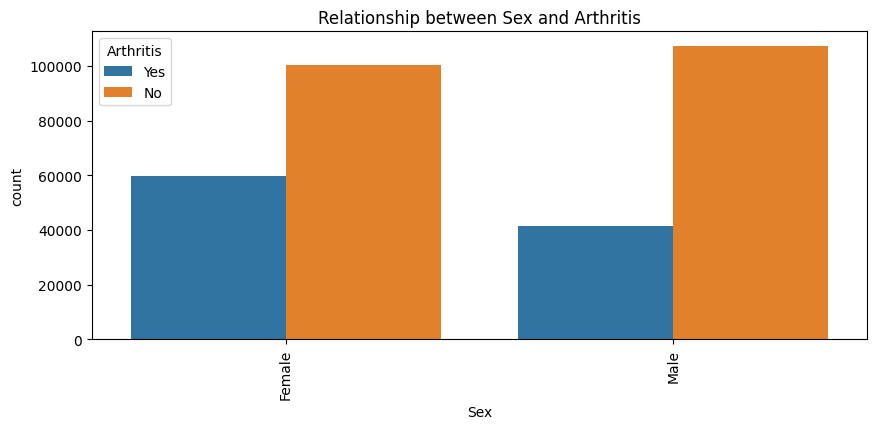

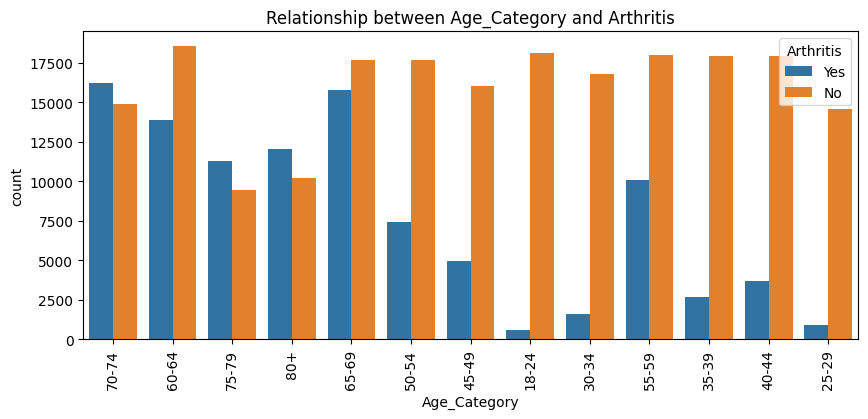

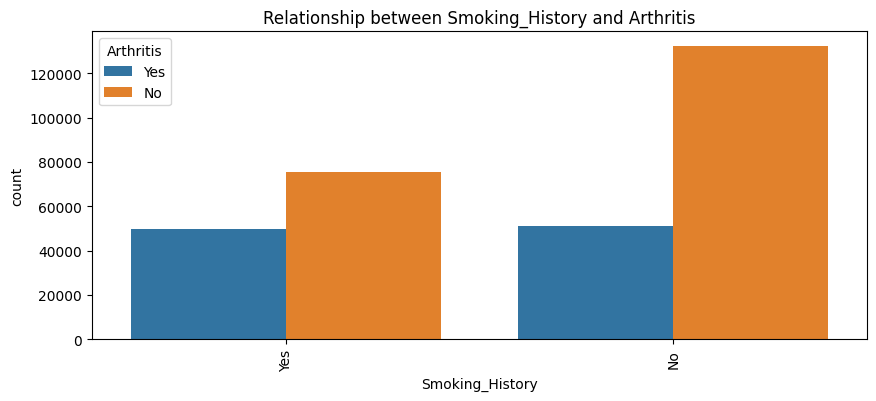

In [14]:
# Analyze the relationship between the disease conditions and some selected variables

selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']

disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']

for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=variable, hue=disease)
        plt.title('Relationship between ' + variable + ' and ' + disease)
        plt.xticks(rotation=90)
        plt.show()

Interpretation of Results:

Heart_Disease:

Heart disease is more prevalent in patients who rate their general health as "Poor" or "Fair".
It is slightly more common in patients who do not exercise.
Males are more likely to have heart disease than females.
The prevalence of heart disease increases with age, with it being most common in the 80+ age category.
Heart disease is also more common in patients with a history of smoking.

Skin_Cancer:

Skin cancer is more prevalent in patients who rate their general health as "Good" or "Very Good".
There is not much difference in prevalence based on exercise habits.
Females are more likely to have skin cancer than males.
The prevalence of skin cancer increases with age, with it being most common in the 70-74 age category.
There is not much difference in prevalence based on smoking history.

Other_Cancer:

Other cancers are more prevalent in patients who rate their general health as "Poor" or "Fair".
They are slightly more common in patients who do not exercise.
There is not much difference in prevalence based on sex.
The prevalence of other cancers increases with age, with it being most common in the 75-79 age category.
Other cancers are more common in patients with a history of smoking.

Diabetes:

Diabetes is more prevalent in patients who rate their general health as "Fair" or "Poor".
It is more common in patients who do not exercise.
There is not much difference in prevalence based on sex.
The prevalence of diabetes increases with age, with it being most common in the 70-74 age category.
Diabetes is more common in patients with a history of smoking.

Arthritis:

Arthritis is more prevalent in patients who rate their general health as "Fair" or "Poor".
It is slightly more common in patients who do not exercise.
Females are more likely to have arthritis than males.
The prevalence of arthritis increases with age, with it being most common in the 75-79 age category.
Arthritis is slightly more common in patients with a history of smoking.

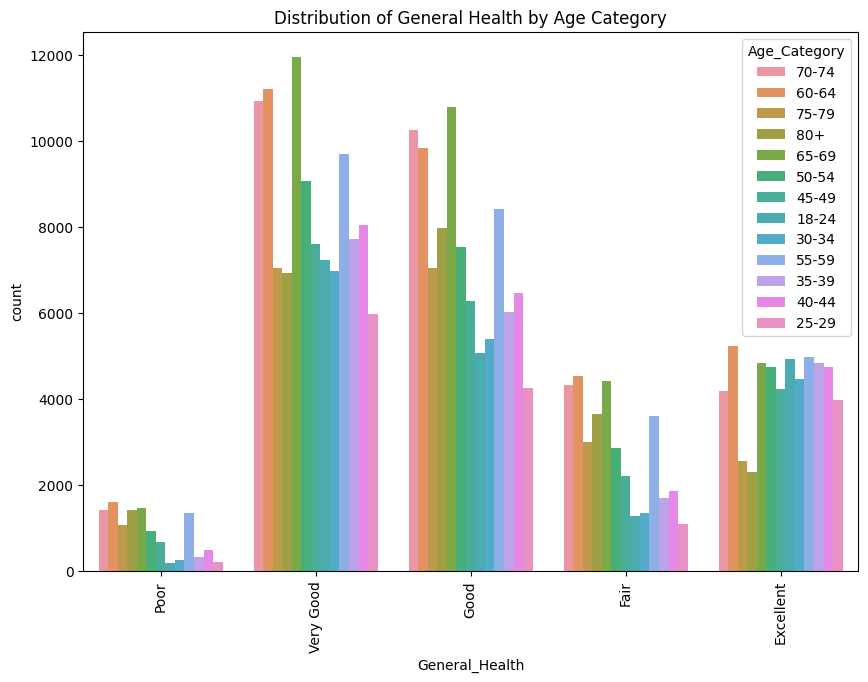

In [15]:
# Multivariate Analysis
# Analyze the relationship between disease conditions, general health, and age category

plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='General_Health', hue='Age_Category')
plt.title('Distribution of General Health by Age Category')
plt.xticks(rotation=90)
plt.show()

The distribution of General Health by Age Category shows that as age increases, the proportion of individuals rating their health as "Good" or "Very Good" decreases, while the proportion rating their health as "Fair" or "Poor" increases.

**Outliers**

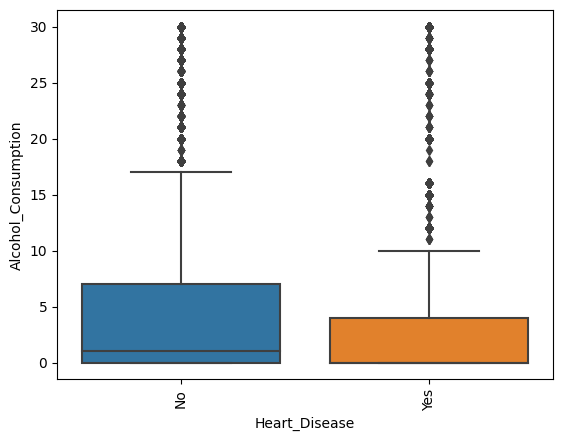

In [16]:
#categorical to quantitative realtionship

sns.boxplot(data=df, x = 'Heart_Disease', y='Alcohol_Consumption')
plt.xticks(rotation='vertical')
plt.show()

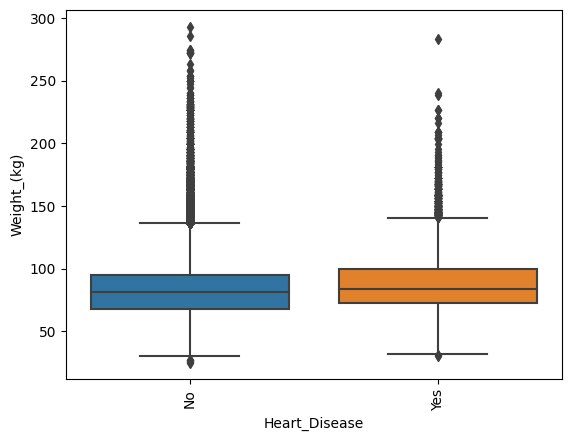

In [17]:
sns.boxplot(data=df, x = 'Heart_Disease', y='Weight_(kg)')
plt.xticks(rotation='vertical')
plt.show()

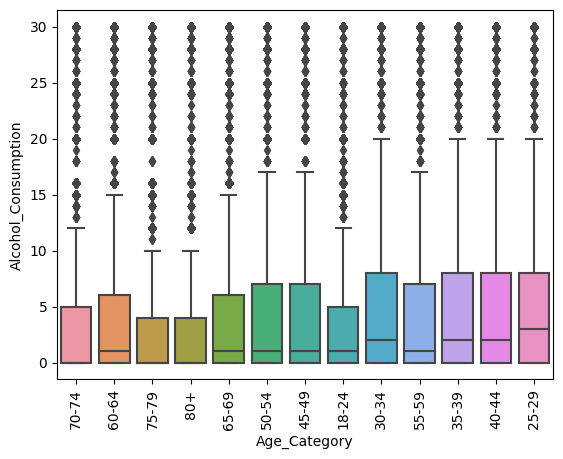

In [18]:
sns.boxplot(data=df, x = 'Age_Category', y='Alcohol_Consumption')
plt.xticks(rotation='vertical')
plt.show()

**3.Data Preprocessing**

In [19]:
#checking for missing values
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [20]:
#checking datatype
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [21]:
df2 = df.select_dtypes(include = ['object'])
df2.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,Yes
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,No
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,No
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,No
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,Yes


In [22]:
# Iterate through each column
for column_name in df2.columns:
    col=df2[column_name].unique()
    print(f"Unique values in {column_name}:")
    print(col,'\n')




Unique values in General_Health:
['Poor' 'Very Good' 'Good' 'Fair' 'Excellent'] 

Unique values in Checkup:
['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never'] 

Unique values in Exercise:
['No' 'Yes'] 

Unique values in Heart_Disease:
['No' 'Yes'] 

Unique values in Skin_Cancer:
['No' 'Yes'] 

Unique values in Other_Cancer:
['No' 'Yes'] 

Unique values in Depression:
['No' 'Yes'] 

Unique values in Diabetes:
['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy'] 

Unique values in Arthritis:
['Yes' 'No'] 

Unique values in Sex:
['Female' 'Male'] 

Unique values in Age_Category:
['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29'] 

Unique values in Smoking_History:
['Yes' 'No'] 



In [23]:
# Apply label encoding to the categorical columns
gn = LabelEncoder()
ck = LabelEncoder()
ex = LabelEncoder()
sk = LabelEncoder()
oc = LabelEncoder()
dp = LabelEncoder()
db = LabelEncoder()
ar = LabelEncoder()
sx = LabelEncoder()
ag = LabelEncoder()
sm = LabelEncoder()
hd = LabelEncoder()


df['General_Health'] = gn.fit_transform(df['General_Health'])
df['Checkup'] = ck.fit_transform(df['Checkup'])
df['Exercise'] = ex.fit_transform(df['Exercise'])
df['Skin_Cancer'] = sk.fit_transform(df['Skin_Cancer'])
df['Other_Cancer'] = oc.fit_transform(df['Other_Cancer'])
df['Depression'] = dp.fit_transform(df['Depression'])
df['Diabetes'] = db.fit_transform(df['Diabetes'])
df['Arthritis'] = ar.fit_transform(df['Arthritis'])
df['Sex'] = sx.fit_transform(df['Sex'])
df['Age_Category'] = ag.fit_transform(df['Age_Category'])
df['Smoking_History'] = sm.fit_transform(df['Smoking_History'])
df['Heart_Disease'] = hd.fit_transform(df['Heart_Disease'])

**Correlation of each feature with the disease variables**

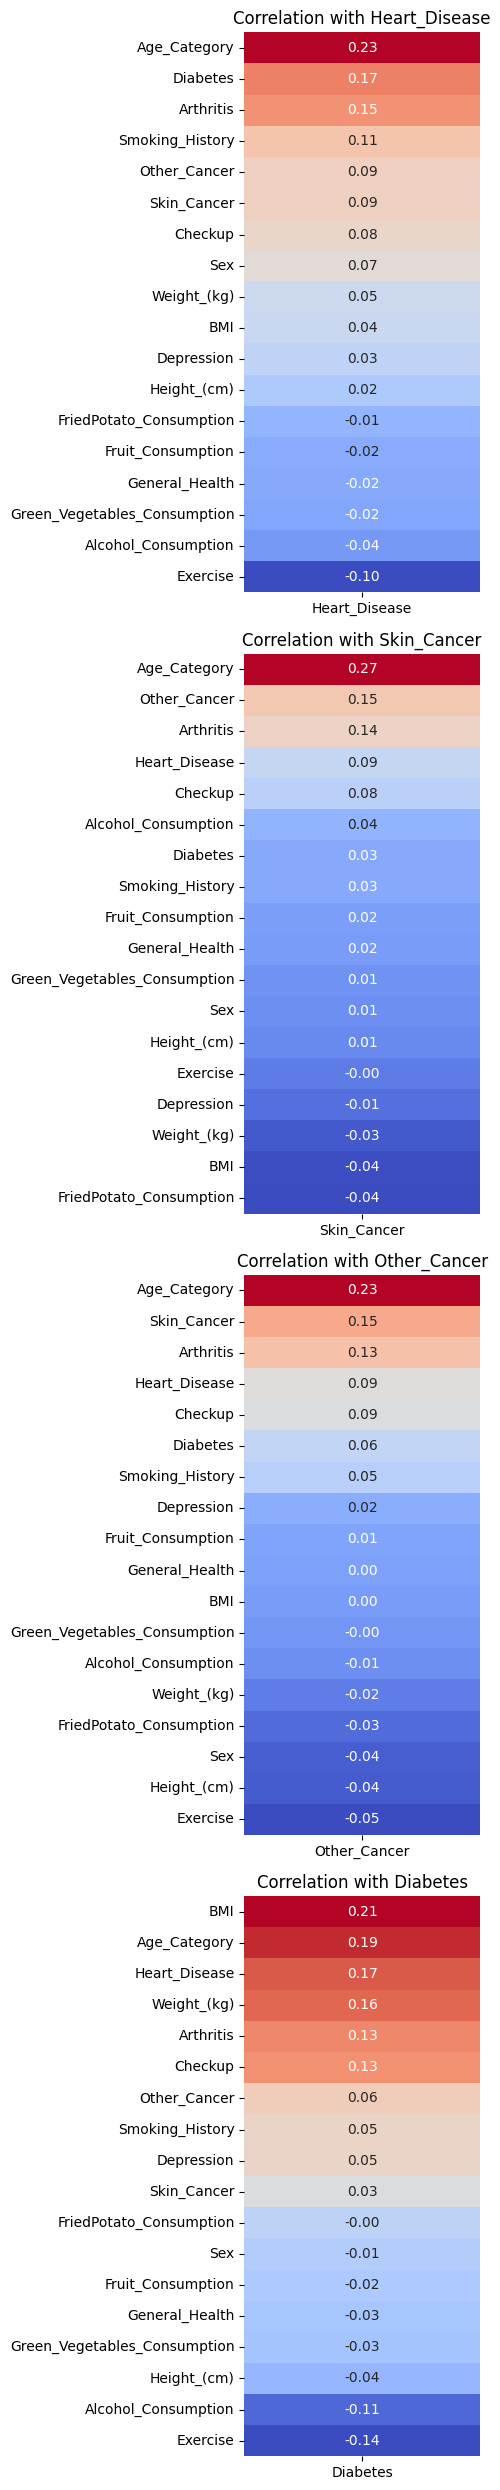

In [24]:
# Compute the correlation of each feature with the disease variables
disease_variables = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes']

# Compute the correlation matrix
corr = df.corr()

# Create a subplot for each disease
fig, axs = plt.subplots(len(disease_variables), 1, figsize=(5, 25))

for ax, disease in zip(axs, disease_variables):
    # Compute the correlation with the disease
    target_corr = corr[disease].drop(disease)

    # Sort correlation values in descending order
    target_corr_sorted = target_corr.sort_values(ascending=False)

    # Plot a heatmap of the correlations with the disease
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True,
                fmt='.2f', cbar=False, ax=ax)
    ax.set_title('Correlation with ' + disease)

plt.tight_layout()
plt.show()

 Interpretation of Results:

The correlation heatmaps show the correlation of each feature with the five disease variables: Heart_Disease, Skin_Cancer, Other_Cancer, Diabetes, and Arthritis.

From the heatmaps, we can observe the following:

Heart_Disease: This condition shows a strong positive correlation with Age_Category and General_Health, and a negative correlation with Exercise and Sex_Female.

Skin_Cancer: This condition is strongly positively correlated with Age_Category and Sex_Male, and negatively correlated with Sex_Female.

Other_Cancer: This condition shows a strong positive correlation with Age_Category and General_Health, and a negative correlation with Sex_Female.

Diabetes: This condition shows a strong positive correlation with Age_Category, General_Health, and BMI, and a negative correlation with Exercise

In [25]:
#checking datatype
df.dtypes


General_Health                    int64
Checkup                           int64
Exercise                          int64
Heart_Disease                     int64
Skin_Cancer                       int64
Other_Cancer                      int64
Depression                        int64
Diabetes                          int64
Arthritis                         int64
Sex                               int64
Age_Category                      int64
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                   int64
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [26]:
df.head(3)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0


In [27]:
# Count duplicates
duplicate_count = df.duplicated().sum()

# Print the count
print("Number of duplicates:", duplicate_count)

# Remove duplicate rows
data = df.drop_duplicates()
print('duplicates removed')

Number of duplicates: 80
duplicates removed


In [28]:
#splitting input and output data
X=df.drop(columns=['Heart_Disease'])
y=df['Heart_Disease']

In [29]:
#scaling the data

sc=MinMaxScaler()
X_sc=sc.fit_transform(X)

In [30]:
df['Heart_Disease'].value_counts()

0    283883
1     24971
Name: Heart_Disease, dtype: int64

**4. Model Building and Evaluation**

In [46]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

**KNN Classifier**

In [32]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
print('knn:',(accuracy_score(y_test,y_pred_knn)*100))

knn: 91.74806004942961


In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred_knn))

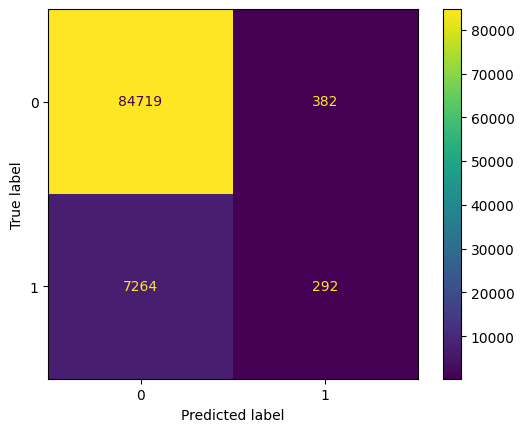

In [47]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))

**XGBoost Classifier**

In [34]:
#Creating the XGBoost object
xgb = XGBClassifier()
eval_set = [(X_test, y_test)]
#Creating XGBoost model for training and predictions
model = xgb.fit(X_train, y_train,
                  eval_metric = "error",
                  eval_set = eval_set,
                  verbose = True,
                 early_stopping_rounds = 10)
#Generating predictions using the XGBoost model
y_pred = model.predict(X_test)
#Testing the accuracy of our model using the test dataset
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[0]	validation_0-error:0.08128
[1]	validation_0-error:0.08128
[2]	validation_0-error:0.08112
[3]	validation_0-error:0.08116
[4]	validation_0-error:0.08108
[5]	validation_0-error:0.08104
[6]	validation_0-error:0.08108
[7]	validation_0-error:0.08109
[8]	validation_0-error:0.08108
[9]	validation_0-error:0.08111
[10]	validation_0-error:0.08108
[11]	validation_0-error:0.08111
[12]	validation_0-error:0.08112
[13]	validation_0-error:0.08117
[14]	validation_0-error:0.08111
[15]	validation_0-error:0.08115
0.9189591719999568


In [35]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     85101
           1       0.57      0.03      0.05      7556

    accuracy                           0.92     92657
   macro avg       0.75      0.51      0.50     92657
weighted avg       0.89      0.92      0.88     92657



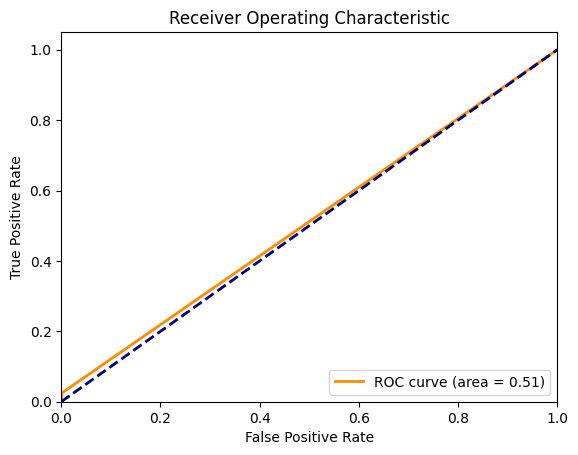

In [53]:
# Compute ROC curve and ROC area
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Under Sampling**

In [36]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(random_state=1)
X_us,y_us=us.fit_resample(X,y)

In [37]:
y_us.value_counts()

0    24971
1    24971
Name: Heart_Disease, dtype: int64

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X_us,y_us,test_size=0.3,random_state=17)

In [39]:
#applying hyperparametretuning

knn1=KNeighborsClassifier()
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}



In [40]:
clf=GridSearchCV(knn1,params,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)
clf.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'distance'}

In [41]:
#knn
knn=KNeighborsClassifier(n_neighbors=9, algorithm='ball_tree', weights='distance')
knn.fit(X_train,y_train)
y_pred_kn=knn.predict(X_test)
y_pred_kn

array([0, 0, 1, ..., 1, 1, 0])

In [42]:
print(classification_report(y_test,y_pred_kn))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63      7474
           1       0.64      0.71      0.67      7509

    accuracy                           0.65     14983
   macro avg       0.65      0.65      0.65     14983
weighted avg       0.65      0.65      0.65     14983



we can conclude that doing undersampling only did lower the accuracy and others values determining a good model

**Artificial Neural Network(ANN)**

In [43]:
from keras.models import Sequential
from keras.layers import Dense,Activation

In [48]:
model=Sequential()
#input layer
model.add(Dense(4,activation='relu'))
#hidden layer
model.add(Dense(8,activation='relu'))
#output layer
model.add(Dense(1,activation='sigmoid'))

In [49]:
#for updating weight
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
model.fit(X_train,y_train,batch_size=10,epochs=10)

Epoch 1/10
21620/21620 [==============================] - 51s 2ms/step - loss: 0.2430 - accuracy: 0.9192
Epoch 2/10
21620/21620 [==============================] - 56s 3ms/step - loss: 0.2318 - accuracy: 0.9194
Epoch 3/10
21620/21620 [==============================] - 38s 2ms/step - loss: 0.2308 - accuracy: 0.9194
Epoch 4/10
21620/21620 [==============================] - 37s 2ms/step - loss: 0.2301 - accuracy: 0.9194
Epoch 5/10
21620/21620 [==============================] - 39s 2ms/step - loss: 0.2294 - accuracy: 0.9194
Epoch 6/10
21620/21620 [==============================] - 38s 2ms/step - loss: 0.2292 - accuracy: 0.9194
Epoch 7/10
21620/21620 [==============================] - 38s 2ms/step - loss: 0.2289 - accuracy: 0.9194
Epoch 8/10
21620/21620 [==============================] - 38s 2ms/step - loss: 0.2288 - accuracy: 0.9194
Epoch 9/10
21620/21620 [==============================] - 37s 2ms/step - loss: 0.2286 - accuracy: 0.9194
Epoch 10/10
21620/21620 [==============================

In [51]:
loss,acc=model.evaluate(X_test,y_test)
print('accuracy:',acc)
print('loss:',loss)

2896/2896 [==============================] - 5s 2ms/step - loss: 0.2304 - accuracy: 0.9185
accuracy: 0.9184519052505493
loss: 0.2304481416940689


In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 76        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 125 (500.00 Byte)
Trainable params: 125 (500.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**New Prediction**

In [55]:
X.head(3)

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0


In [59]:
new_pred=model.predict(sc.transform([[3,2,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0]]))
new_pred
import numpy as np
pred=np.argmax(new_pred)
pred

1/1 [==============================] - 0s 140ms/step


0

In [62]:
npred=hd.inverse_transform([pred])
print(npred)

['No']


**CONCLUSION:** The project achieved a remarkable accuracy of 91.8% in predicting heart disease, demonstrating the efficacy of XGBoost and Artificial Neural Networks (ANN) in healthcare applications.